In [1]:
import numpy as np
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys

import argparse, os, math, pickle, json

# 1) Load your model
from dual_alm_rnn_models import *
from dual_alm_rnn_exp import DualALMRNNExp
plt.rcParams['pdf.fonttype'] = '42' 


In [74]:
def get_cosine_similarity(a, b):

    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

recurrent_optimal = np.array([1.0, -1.0, -1.0, 1.0], dtype=np.float32)
# recurrent_optimal = np.array([0.0, 0.0, 1.0, 1.0], dtype=np.float32)


In [66]:
exp=DualALMRNNExp()


# Load configs to get model parameters
with open('dual_alm_rnn_configs.json', 'r') as f:
    configs = json.load(f)

model = getattr(sys.modules[__name__], configs['model_type'])(configs, \
    exp.a, exp.pert_begin, exp.pert_end, noise=True)

model_path = '/Users/catherinewang/Desktop/RNN/Dual_ALM_RNN/dual_alm_rnn_models/TwoHemiRNNTanh_single_readout/train_type_asymmetric_fixed_input_mult_seeds/n_neurons_4_random_seed_3/unfix_epoch_1/n_epochs_40_n_epochs_across_hemi_0/lr_3.0e-03_bs_75/sigma_input_noise_0.10_sigma_rec_noise_0.10/xs_left_alm_amp_1.00_right_alm_amp_1.00/init_cross_hemi_rel_factor_0.20/model_epoch_0.pth'
# checkpoint_path = os.path.join(model_path.format(seed, unfix_epoch), checkpoint_file)
# if not os.path.exists(checkpoint_path):
#     raise FileNotFoundError(f"Model checkpoint not found at {checkpoint_path}")

state_dict = torch.load(model_path, map_location='cpu', weights_only=True)
model.load_state_dict(state_dict)
print(model.rnn_cell.w_hh_linear_rr.weight.data.cpu().numpy())

Fixed input weights for left and right ALM
[[ 0.24889047 -0.06994749]
 [ 0.5008555   0.3869075 ]]


In [57]:
testrecc = np.load('test/all_recurrent_weights.npy')

testrecc[1,:,:]


array([[-1.07607   ,  0.12928502],
       [ 0.02414507, -0.06225583]], dtype=float32)

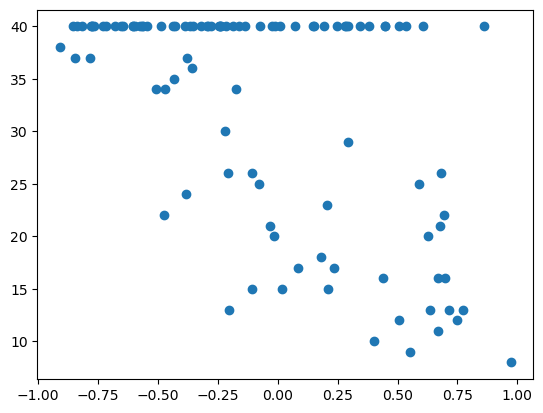

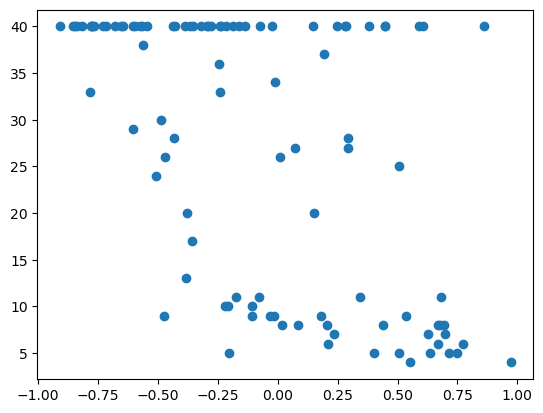

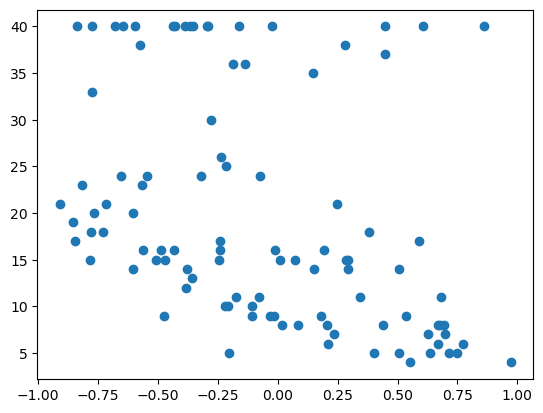

In [75]:
all_alignments = []
for unfix_epoch in [1, 11, 40]:
    readout_bias = np.load('test/figs/epoch_{}/all_readout_bias.npy'.format(unfix_epoch))
    readout_weights = np.load('test/figs/epoch_{}/all_readout_weights.npy'.format(unfix_epoch))
    recurrent_weights = np.load('test/figs/epoch_{}/all_recurrent_weights.npy'.format(unfix_epoch))
    recurrent_bias = np.load('test/figs/epoch_{}/all_recurrent_bias.npy'.format(unfix_epoch))
    learning_epoch = np.load('test/figs/epoch_{}/all_learning_epoch.npy'.format(unfix_epoch))

    alignments = []
    for i in range(len(recurrent_weights)):
        alignments.append(get_cosine_similarity(recurrent_weights[i].flatten(), recurrent_optimal))

    plt.scatter(alignments, learning_epoch)
    plt.show()
    

    # plt.plot(learning_epoch)
    # plt.title('Learning Epoch for Unfix Epoch {}'.format(unfix_epoch))
    # plt.show()